<a href="https://colab.research.google.com/github/ahmer-talal/Colab-Files/blob/main/obaid_sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                text airline_sentiment  \
0                @VirginAmerica What @dhepburn said.           neutral   
1  @VirginAmerica plus you've added commercials t...          positive   
2  @VirginAmerica I didn't today... Must mean I n...           neutral   
3  @VirginAmerica it's really aggressive to blast...          negative   
4  @VirginAmerica and it's a really big bad thing...          negative   

  predicted_sentiment  
0             neutral  
1             neutral  
2            negative  
3            positive  
4            negative  
Accuracy: 45.11%
Confusion Matrix:
 [[3034 3530 2614]
 [ 295 1831  973]
 [ 123  501 1739]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.33      0.48      9178
     neutral       0.31      0.59      0.41      3099
    positive       0.33      0.74      0.45      2363

    accuracy                           0.45     14640
   macro avg       0.51 

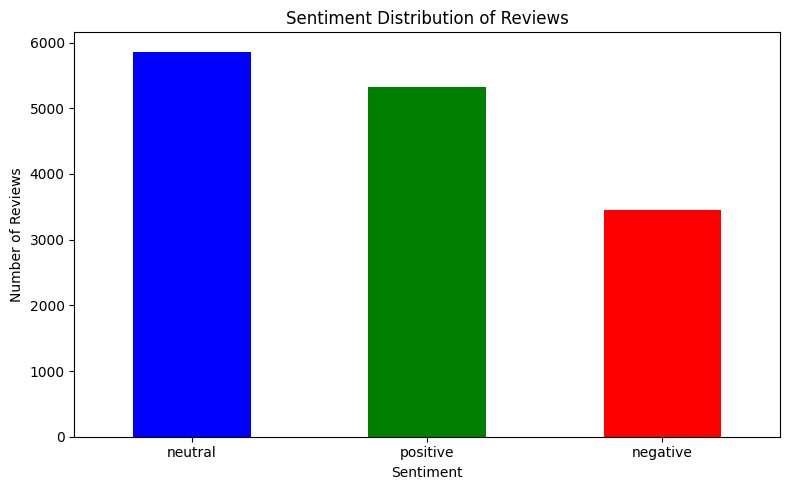

In [ ]:
import pandas as pd
import re
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("Tweets.csv")

# Select only required columns
df = df[["text", "airline_sentiment"]]

# Download NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt_tab")

# Preprocessing setup
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Clean text function
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", str(text))
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning
df["cleaned_text"] = df["text"].apply(preprocess_text)

# Sentiment polarity function
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df["polarity"] = df["cleaned_text"].apply(get_polarity)

# Classify based on polarity
def classify_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

df["predicted_sentiment"] = df["polarity"].apply(classify_sentiment)

# Results preview
print(df[["text", "airline_sentiment", "predicted_sentiment"]].head())

# Accuracy score
accuracy = accuracy_score(df["airline_sentiment"], df["predicted_sentiment"])
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(df["airline_sentiment"], df["predicted_sentiment"]))

# Classification metrics
print("Classification Report:\n", classification_report(df["airline_sentiment"], df["predicted_sentiment"]))

# Plot chart
plt.figure(figsize=(8,5))
value_counts = df["predicted_sentiment"].value_counts()
order = value_counts.index.tolist()
color_map = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}
colors = [color_map[sentiment] for sentiment in order]

value_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()